## https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

In [41]:
data =pd.read_csv('bank-additional-full.csv',sep=';')

In [42]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [44]:
data.shape

(41188, 21)

In [45]:
data.shape

(41188, 21)

In [46]:
#data['nr.employed'].unique()

In [47]:
Null_values_data=data.isnull().sum()/len(data)*100

In [48]:
dtype_attribute=data.columns.to_series().groupby(data.dtypes).groups
#dtype_attribute

In [49]:
x = data.columns.to_series().groupby(data.dtypes).groups
x

{dtype('int64'): Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 dtype('float64'): Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
        'nr.employed'],
       dtype='object'),
 dtype('O'): Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome', 'y'],
       dtype='object')}

In [50]:
categorical_list =[x for x in data.columns if data[x].dtype==object]
#categorical_list    


In [51]:
unique_values_dict ={}
for i in categorical_list:
    li=[]
    unique_values_dict[i]=data[i].unique()
    

In [52]:
unique_values_dict

{'contact': array(['telephone', 'cellular'], dtype=object),
 'day_of_week': array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree', 'illiterate'], dtype=object),
 'housing': array(['no', 'yes', 'unknown'], dtype=object),
 'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 'loan': array(['no', 'yes', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'], dtype=object),
 'poutcome': array(['nonexistent', 'failure', 'success'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

In [53]:
key_list = data['y'].value_counts().index.tolist()

In [54]:
value_list=data['y'].value_counts().tolist()

In [55]:
dict_response = dict(zip(key_list,value_list))

In [56]:
dict_response_percentage={}
dict_response_percentage['no'] = dict_response['no']/(dict_response['no']+dict_response['yes'])
dict_response_percentage['yes'] = dict_response['yes']/(dict_response['no']+dict_response['yes'])

In [57]:
dict_response_percentage

{'no': 0.8873458288821987, 'yes': 0.11265417111780131}

In [58]:
sns.set_style('whitegrid')

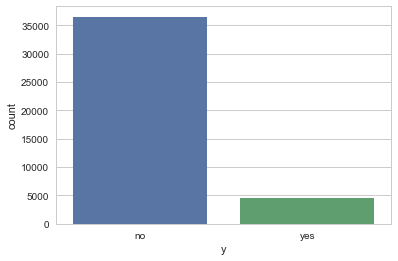

In [59]:
sns.countplot(data=data,x='y')
#Shows Class imbalance problem

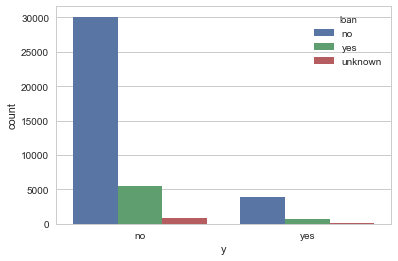

In [60]:
sns.countplot(data=data,hue='loan',x='y')

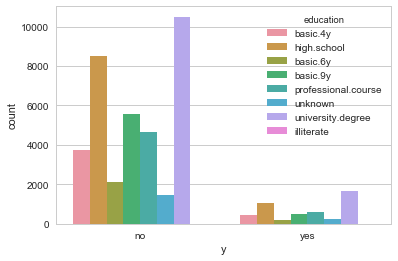

In [61]:
sns.countplot(data=data,hue='education',x='y')

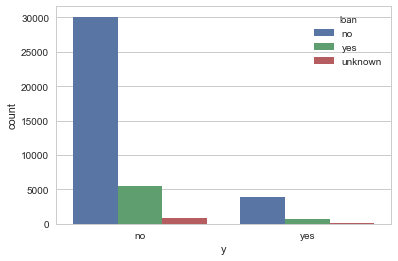

In [62]:
sns.countplot(data=data,hue='loan',x='y')

In [63]:
dict_y ={"y":{'yes':1,'no':0}}
data.replace(dict_y,inplace = True)

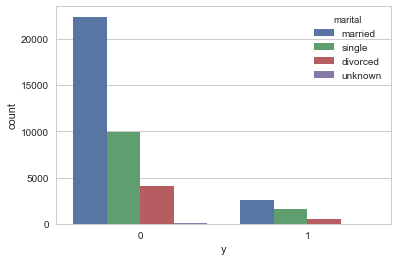

In [64]:
sns.countplot(data=data,hue='marital',x='y')

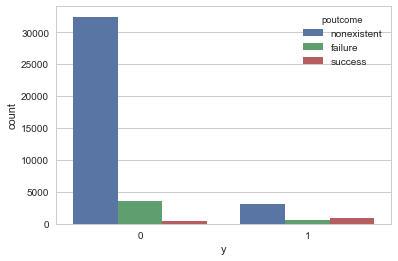

In [65]:
sns.countplot(data=data,hue='poutcome',x='y')

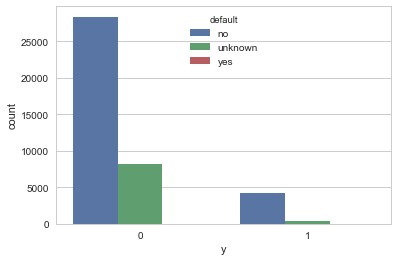

In [66]:
sns.countplot(data=data,hue='default',x='y')

In [67]:
#sns.boxplot(data = data,x='poutcome',y='y')

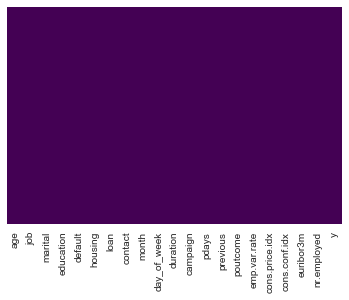

In [68]:
#To Check Null Values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

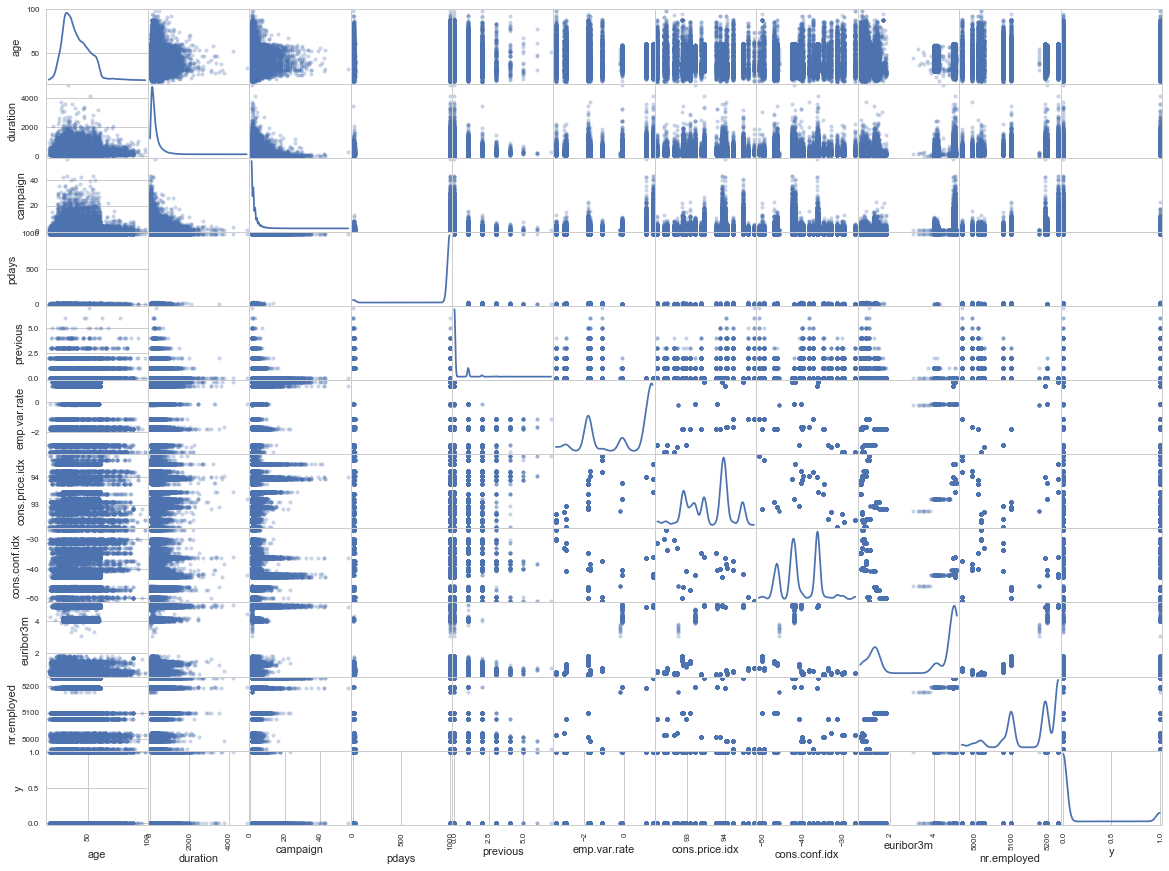

In [69]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (20,15), diagonal = 'kde');

In [70]:
data['age'].corr(data['duration'])

-0.00086570501014093934

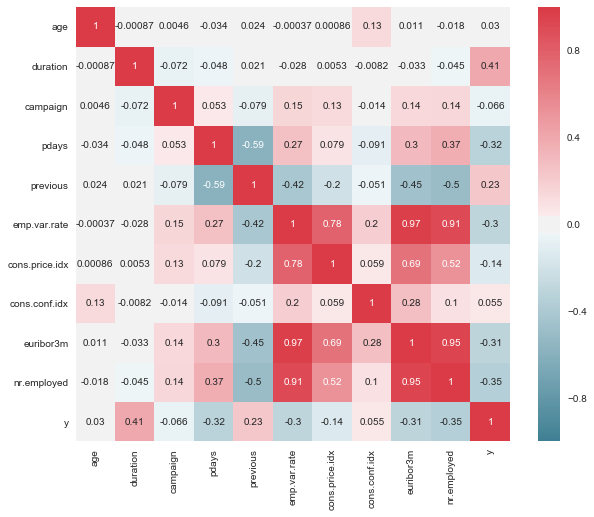

In [71]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [72]:
data=pd.get_dummies(data=data,columns=['job','education','default','housing','loan','contact',
'month','day_of_week','poutcome','marital'])

In [77]:
df_0=data[data['y']==0]

In [80]:
df_0.shape

(36548, 64)

In [78]:
df_1=data[data['y']==1]

In [79]:
df_1.shape

(4640, 64)

In [86]:
df_0.shape

(36548, 64)

In [88]:
df_0_5000 = df_0[:5000]
df_0_5000.shape

(5000, 64)

In [89]:
frames =[df_0_5000,df_1]
final_df = pd.concat(frames)

In [91]:
final_df = final_df.sample(frac=1)

In [93]:
X_underSample = final_df.drop('y', axis = 1)
y_underSample = final_df['y']

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_underSample, y_underSample, 
                                                    test_size=0.3,random_state=10)
clf = LogisticRegression(C=.01,max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
pred = clf.predict(X_test)
pred.shape

(2892,)

In [96]:
accuracy_score(pred,y_test)

0.97475795297372059

In [97]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98      1541
          1       0.98      0.96      0.97      1351

avg / total       0.97      0.97      0.97      2892



In [34]:
X = data.drop('y', axis = 1)
y = data['y']

In [35]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
clf = LogisticRegression(C=.01,max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
pred = clf.predict(X_test)
pred.shape

(12357,)

In [38]:
accuracy_score(pred,y_test)

0.90669256291980249

In [39]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     10935
          1       0.67      0.38      0.48      1422

avg / total       0.89      0.91      0.90     12357



In [351]:
cv = KFold(n_splits=5, shuffle=True)
crossval_score = cross_val_score(clf,X,y,cv=5)

In [352]:
crossval_score.mean()

0.82678957974874179

In [353]:
y.shape

(41188,)

0.677176121269


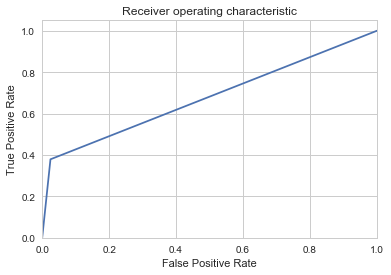

In [356]:
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc_score(y_test, pred))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [303]:
y = label_binarize(y, classes=[0, 1])

In [310]:
y_test[i]

0

In [304]:
n_classes = y.shape[1]

In [306]:
y.shape

(41188, 1)

In [20]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
le.fit(data['marital'])
data['marital'] = le.transform(data['marital'])
#list(le.inverse_transform(data['marital']))

In [21]:
data['job'] = le.fit_transform(data['job'])

In [22]:
data['education'] = le.fit_transform(data['education'])

In [23]:
data['default'] = le.fit_transform(data['default'])

In [24]:
data['housing'] = le.fit_transform(data['housing'])

In [25]:
data['loan'] = le.fit_transform(data['loan'])

In [26]:
data['contact'] = le.fit_transform(data['contact'])

In [27]:
data['month'] = le.fit_transform(data['month'])

In [28]:
data['day_of_week'] = le.fit_transform(data['day_of_week'])

In [29]:
data['poutcome'] = le.fit_transform(data['poutcome'])

In [30]:
dict_y ={"y":{'yes':1,'no':0}}

In [31]:
data.replace(dict_y,inplace = True)

In [32]:
data['default'].corr(data['y'])

-0.099351797761485602

In [101]:
#plt.scatter(data['education'],data['y'])

In [34]:
X = data.drop('y', axis = 1)
y = data['y']

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
clf = LogisticRegression(C=.001,max_iter=1000)
clf.fit(X_train, y_train)
#X_train.shape

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
pred = clf.predict(X_test)
pred.shape


(12357,)

In [94]:
accuracy_score(pred,y_test)

0.90612608238245529

In [95]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     10935
          1       0.66      0.37      0.48      1422

avg / total       0.89      0.91      0.89     12357



In [56]:
cv = KFold(n_splits=5, shuffle=True)
crossval_score = cross_val_score(clf,X,y,cv=5)

In [57]:
crossval_score.mean()

0.83506891302200703

# DecisionTreeClassifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [96]:
pred = dt.predict(X_test)

In [97]:
accuracy_score(pred,y_test)

0.8896172210083354

In [99]:
pred = dt.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94     10935
          1       0.52      0.52      0.52      1422

avg / total       0.89      0.89      0.89     12357

